<a href="https://colab.research.google.com/github/JHKim-snu/AI_Expert/blob/main/Lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy
* Array 및 Tensor들과 관련된 연산을 편리하게 하기 위한 라이브러리이다.
* numpy 모듈 설치 후 import numpy (as np)로 import하여 사용하면 된다.
 * colab에는 기본적으로 설치되어있다.

In [ ]:
import numpy as np


# np.array
 * python array와 같은 element를 가지는 numpy ndarray를 만드는 함수
 * np.array(object, dtype=None)
  * object : 값을 가져올 python array
  * dtype : 각 component가 가질 data type. int, float, bool 등이 있으며, 입력하지 않을 시 object에 맞춰서 자동으로 결정된다.
  

In [ ]:
a = np.array([1, 2, 3, 4, 5])

print(a)

b = np.array([[1, 2], [3, 4]], dtype=float)

print(b)

c = np.array([1, 0, 0, 1], dtype=bool)

print(c)

[1 2 3 4 5]
[[1. 2.]
 [3. 4.]]
[ True False False  True]


# shape
* numpy array는 **모양(shape)**와 **데이터 타입(dtype)**을 가진다.
* 3차원 벡터는 shape가 (3), 5x3 행렬은 shape가 (5, 3), 4x3x2 텐서는 shape가 (4, 3, 2)...와 같은 식


In [ ]:
print(a.shape)
print(b.shape)
print(c.shape)

(5,)
(2, 2)
(4,)


# np.zeros, np.ones, np.full
* 주어진 형태의 numpy array들을 만드는 함수
* np.zeros(shape, dtype=None)
* np.ones(shape, dtype=None)
* np.full(shape, fill_value, dtype=None)
 * shape : 해당 numpy array가 가질 shape
 * fill_value : 해당 numpy array에 채울 상수
 * dtype : 해당 numpy array의 각 component가 가질 data type
 

In [ ]:
zeros = np.zeros([3, 3])
ones = np.ones([3, 3])
twos = np.full([3, 3], 2)

print(zeros, zeros.shape)
print(ones, ones.shape)
print(twos, twos.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (3, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3)
[[2 2 2]
 [2 2 2]
 [2 2 2]] (3, 3)


# Array 연산
* 기본적으로 같은 크기의 array끼리 사칙연산이 가능하다.
* 이 경우, 같은 위치의 component들끼리 연산된다.

In [ ]:
print(zeros + ones)
print(ones / twos)
print(zeros + ones * twos)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


* ==, <, > 등의 등호/부등호 연산자도 사용가능하며, 이 경우 결과값은 boolean array가 된다.

In [ ]:
print(zeros == [[0, 0, 0], [0, 0, 0], [0, 0, 0]])
print(zeros > ones)


[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[False False False]
 [False False False]
 [False False False]]


# Brodacasting
* 서로 다른 shape를 가진 array끼리도, 조건이 맞는다면 연산이 가능하다.
* 예컨대 a가 n차원이고 b가 1차원이라면 b의 값들을 n차원으로 복제하여 계산하는 식
* 차원의 비교는 뒤쪽에서부터 한다.
* 정확한 룰은 다음과 같다 :
 * a의 shape가 [n1, n2, ...nk] 이고, b의 shape가 [m1, m2, ..., ml] 이라 하자.
 * (i, j) = (k, l)부터 시작하여 i와 j를 1씩 낮춰가며 ni와 mj를 비교한다.(i나 j가 0이 될 때까지)
 * ni = mj 이라면 차원을 그대로 놔둔다.
 * ni = 1 이라면, a의 i번째 차원(1차원)을 복제하여 mj차원으로 늘린다.
 * mj = 1 이라면, b의 j번째 차원(1차원)을 복제하여 ni차원으로 늘린다.
 * 세 경우 다 아니라면, Broadcasting이 안되는 것이므로 ValueError를 낸다.
 * i나 j가 0이 되었다면, shape의 길이가 더 작은 쪽(i나 j가 먼저 0이 된 쪽)의 나머지 차원이 모두 1이라고 간주하고 복제하여 더 큰 쪽의 차원에 맞춘다.

  
  

<img src="https://s3.amazonaws.com/cloudxlab/static/images/course/numpy_pandas_for_ml/Broacasting_2_rule.png" alt="Alt text" title="Optional title">


* 출처: https://s3.amazonaws.com/cloudxlab/static/images/course/numpy_pandas_for_ml/Broacasting_2_rule.png

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('a :')
print(a)
print(a.shape)
b = np.array([-1, 0, 1])
print('\n\nb :')
print(b)
print(b.shape)
c = a + b                   # b is broadcasted into shape (2, 3), and become [[-1, 0, 1], [-1, 0, 1]]
print('\n\na + b :')
print(c)
print(c.shape)

a :
[[1 2 3]
 [4 5 6]]
(2, 3)


b :
[-1  0  1]
(3,)


a + b :
[[0 2 4]
 [3 5 7]]
(2, 3)


# Broadcasting : example
* 예컨대 64x64 크기의 RGB 이미지 a의 모든 픽셀에 일정한 RGB값 b를 더해주고 싶다고 하자.
* 이 때는 그냥 a + b를 해주면 된다.
* a의 shape가 [64, 64, 3]이고 b의 shape가 [3]인 경우이므로, 뒤쪽 차원인 3이 같다. 이 경우 b쪽의 shape의 길이가 더 작으므로 b는 [1, 1, 3]의 shape를 가지고 있다고 간주하고, b를 복제하여 [64, 64, 3]의 shape를 갖게 만든다. 

a.shape :  (300, 200, 3)


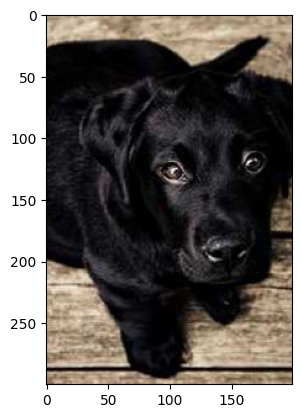

In [5]:

import numpy as np
url = 'https://picsum.photos/id/237/200/300'
from PIL import Image
import requests
from io import BytesIO

from matplotlib.pyplot import imshow

response = requests.get(url)
img = Image.open(BytesIO(response.content))
a = np.asarray(img)
print('a.shape : ', a.shape)
b = [64, 64, 64]

imshow(a)

In [6]:
print('(a+b).shape : ', (a+b).shape)
imshow(a+b)                            # a의 각 픽셀에 [64, 64, 64]를 더한다.

ValueError: ignored

# Array Indexing
* 기본적으로 python의 indexing과 동일하다.
* -1   &nbsp;&nbsp;&nbsp;&nbsp;&mdash; 맨 끝 원소
* n:m  &nbsp;&mdash; n번째 원소부터 m-1번째 원소까지
* :    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&mdash; 해당 차원에 있는 원소 전부

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(a[0], '\n')           # a의 0번째 행
print(a[1][-1], '\n')       # a의 1번째 행의 마지막 원소
print(a[0:2], '\n')         # a의 0번째 행~1번째 행
print(a[:, 1], '\n')        # a의 1번째 열 전체
print(a[1:-1, :], '\n')      # a의 1번째 행 ~ 마지막에서 2번째 행 전체


[1 2 3] 

6 

[[1 2 3]
 [4 5 6]] 

[2 5 8] 

[[4 5 6]] 



#np.sum
* 해당 array/tensor의 특정 축을 따라 모든 원소를 더한다. 축이 명시되지 않았다면, 모든 원소를 더한다.
* np.sum(a, axis=None, keepdims=False)
 * a : 해당 array
 * axis : element를 따라 더할 축의 index
 * keepdims : True일 경우 해당 축에 1차원 벡터로 남고, False일 경우 해당 축에 (0차원) element로 남는다.

In [ ]:
a = np.array([[1, 2, 3], [3, 5, 7]])
print(np.sum(a))

# a의 shape가 [2, 3]이므로, axis=0으로 하면 첫 번째 축을 따라 더하므로 결과 array의 shape [1, 3]이 된다.
# axis=1로 하면 두 번째 축을 따라 더하므로 결과 array의 shape가 [2, 1]이 된다.


print(np.sum(a, axis=0, keepdims=True))    #   1    2     3
                                           #   |    |     |
                                           #   |    |     |
                                           #   3    5     7
                                           #   |    |     |
                                           #   V    V     V
                                           #   4    7     10
                              
print(np.sum(a, axis=1, keepdims=True))    #   -- 1 -- 2 -- 3 --> 6
                                           #   -- 3 -- 5 -- 7 --> 15

# keepdims=False로 하면 결과 array의 shape가 [2]가 된다.
print(np.sum(a, axis=1, keepdims=False))

21
[[ 4  7 10]]
[[ 6]
 [15]]
[ 6 15]


#np.mean, np.std, np.var
* 해당 array/tensor의 특정 축을 따라 평균/표준편차/분산을 구한다. 축이 명시되지 않았다면, 모든 원소의 평균/표준편차/분산을 구한다.
* np.mean(a, axis=None, keepdims=False)
* np.std(a, axis=None, keepdims=False)
* np.var(a, axis=None, keepdims=False)

In [ ]:
print(np.mean(a))
print(np.std(a, axis=0))
print(np.var(a, axis=1))

3.5
[1.  1.5 2. ]
[0.66666667 2.66666667]


#np.reshape
* 해당 numpy array를 주어진 shape로 바꾼다. 이 때, 원래 array의 shape와 바꿀 shape의 총 크기는 같아야 한다.
* np.reshape(a, newshape)
 * a : reshape시킬 array
 * newshape : 바꿀 shape
* 최대 하나의 dimension의 크기를 -1로 입력할 수 있으며, 이 때 해당 dimension의 크기는 나머지 dimension들의 크기에 따라 자동으로 결정된다.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('a')
print(a, a.shape)

print('\nb')
b = np.reshape(a, [6, 1])
print(b, b.shape)

print('\nc')
c = np.reshape(a, [3, -1])    #[3, 2]로 자동으로 변환된다.
print(c, c.shape)

a
[[1 2 3]
 [4 5 6]] (2, 3)

b
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1)

c
[[1 2]
 [3 4]
 [5 6]] (3, 2)


# np.stack
* **새로운 축을 만든 뒤** 해당 array들을 해당 축 방향으로 쌓아서 새로운 array를 만든다. 이 때 쌓을 array들의 shape는 완전히 같아야 한다.
* np.stack(arrays, axis=0)
 * arrays : 쌓을 array들
 * axis : 쌓을 축의 index. axis=-1로 할 시 마지막 축을 따라 쌓는다.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([4, 5, 6, 7])

# shape[3]과 shape[3]을 0번 축을 따라 쌓으므로 결과 array의 shape는 [2, 3]이 된다.
print(np.stack((a, b)))

# shape[3]과 shape[3]을 1번 축을 따라 쌓으므로 결과 array의 shape는 [3, 2]가 된다. 
print(np.stack((a, b), axis=1))


#print(np.stack((a, c)))  #->  ValueError! 크기가 안 맞으므로 쌓을 수 없다.


a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[7, 8, 9], [10, 11, 12], [13, 14, 15]])

# shape[3, 3]과 shape[3, 3]을 1번 축을 따라 쌓으므로 결과 array의 shape는 [3, 2, 3]이 된다.
print()
print(np.stack((a, b), axis=1))


[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]

[[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]

 [[ 7  8  9]
  [13 14 15]]]


#np.concatenate
* 해당 array들을 **기존의 주어진 축 방향으로** 연결한다. 이 때 array들의 shape는 연결할 축을 제외하고 shape가 완전히 같아야 한다.
* np.concatenate(arrays, axis=0)
 * arrays : 연결할 array들
 * axis : 연결할 축의 index. axis=-1로 할 시 마지막 축을 따라 연결한다.

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])


# shape[2, 2]와 shape[1, 2]를 0번 축 방향으로 연결하므로 결과 array의 shape는 [3, 2]가 된다.
print(np.concatenate((a,b), axis=0))

c = np.array([[7, 8, 9], [10, 11, 12]])

# shape[2, 2]와 shape[2, 3]을 1번 축 방향으로 연결하므로 결과 array의 shape는 [2, 5]가 된다.
print(np.concatenate((a, c), axis=1))

[[1 2]
 [3 4]
 [5 6]]
[[ 1  2  7  8  9]
 [ 3  4 10 11 12]]


#np.random.random(size)
* 각 element가 0에서 1사이의 랜덤한 값들을 가지는 size 크기의 array를 만든다.
* 각 element는 서로 독립이며, 모두 uniform random distribution을 따른다.

#np.random.randint(low, high=None, size=None)
* high가 None일 때 : 각 element가 0 이상 low 이하의 랜덤한 정수인, size 크기의 array를 만든다.
* high가 주어졌을 때 : 각 element가 low 이상 high 이하의 랜덤한 정수인, size 크기의 array를 만든다.
* 각 element는 서로 독립이며, 범위 내의 각 정수가 나올 확률은 모두 같다.

#np.random.normal(loc=0.0, scale=1.0, size=None)
* 각 element가 평균이 loc이고 표준편차가 scale인 정규분포에서 추출된, size 크기의 array를 만든다.
* 각 element는 서로 독립이며, N(loc, scale^2)의 분포를 가진다.

In [ ]:
print('np.random.random((2, 3)) :')
print(np.random.random(size=(2, 3)))
print('\nnp.random.randint(3, size=(2, 3)) :')
print(np.random.randint(3, size=(2, 3)))
print('\nnp.random.randint(3, 8, size=(2, 3)) :')
print(np.random.randint(3, 8, size=(2, 3)))
print('\nnp.random.normal(2, 1, size=(2, 3)) :')
print(np.random.normal(2, 1, size=(2, 3)))

np.random.random((2, 3)) :
[[0.55380521 0.47484035 0.41128984]
 [0.23645287 0.05808476 0.77312212]]

np.random.randint(3, size=(2, 3)) :
[[2 2 0]
 [1 0 1]]

np.random.randint(3, 8, size=(2, 3)) :
[[3 3 5]
 [5 7 5]]

np.random.normal(2, 1, size=(2, 3)) :
[[1.85892876 3.03629825 1.30196629]
 [1.71492068 1.97904854 1.82491276]]


# Numpy array를 파일에 저장하고 불러오기
* pickle 라이브러리를 이용하면 편하다.
* pickle.dump(array, file) : 해당 array를 file에 저장한다.
* pickle.load(f) : 해당 file에서 array를 로드하여 리턴한다.

In [ ]:
import pickle

a = np.array([[1, 2, 3], [4, 5, 6]])
with open('./a.pkl', 'wb') as f:
  pickle.dump(a, f)

with open('./a.pkl', 'rb') as f:
  b = pickle.load(f)

print(b)

[[1 2 3]
 [4 5 6]]


# 그 외에 유용한 함수들
* 각자 googling해서 정확한 용법을 찾아보세요! numpy를 사용하면서 한번쯤은 꼭 사용하게 될 편리한 함수들입니다.
* np.max, np.min : 최대, 최소값을 리턴
* np.argmax, np.argmin : 최대, 최소로 만드는 index(들)을 리턴
* np.where : 특정 조건을 만족하는 곳에서 x의 값을, 아닌 곳에서 y의 값을 가지는 array를 리턴
* np.argwhere : 특정 조건을 만족하는 index(들)을 리턴
* np.take : 해당 array에서 해당 index들을 뽑아 만든 array를 리턴
* np.sort : 해당 array를 주어진 기준에 대하여 정렬
* np.transpose (또는 np.ndarray.T) : 해당 array를 transpose
* np.expand_dims : 해당 array에 축을 추가
* np.squeeze : 차원 크기가 1인 축을 제거

* np.exp, np.log, np.sqrt, np.sin, np.cos, np.tan, ... : element-wise 함수들
* np.matmul : 행렬 곱
* 등등등... 필요한 게 있을 때는 구글링을 하거나 https://docs.scipy.org/doc/numpy/reference/index.html 를 참조


# pytorch 라이브러리
* numpy에 있는 대부분의 함수들과 같은 역할을 pytorch 함수가 존재한다.
* numpy의 함수들은 numpy array를 리턴하지만, pytorch의 함수들은 pytorch Tensor들을 리턴한다는 점이 다르다.
* np.array -> torch.Tensor
* np.sum -> torch.sum
* np.reshape -> torch.view
* 등등등... 역할은 거의 같으니 필요한 게 있다면 https://pytorch.org/docs/stable/torch.html 를 참조

In [ ]:
import torch
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
a.view([3, 2])

tensor([[1, 2],
        [3, 4],
        [5, 6]])